In [92]:
import numpy as np
import numpy.linalg as la
np.set_printoptions(suppress=True)#scientific notations to float


In [93]:
L = np.array([[0,   1/2, 1/3, 0, 0,   0 ],
              [1/3, 0,   0,   0, 1/2, 0 ],
              [1/3, 1/2, 0,   1, 0,   1/2 ],
              [1/3, 0,   1/3, 0, 1/2, 1/2 ],
              [0,   0,   0,   0, 0,   0 ],
              [0,   0,   1/3, 0, 0,   0 ]])

In [94]:
eVals, eVecs = la.eig(L) # Gets the eigenvalues and vectors
order = np.absolute(eVals).argsort()[::-1] # Orders them by their eigenvalues
eVals = eVals[order]
eVecs = eVecs[:,order]

r = eVecs[:, 0] # Set r to be the principal eigenvector
100 * np.real(r / np.sum(r)) # Make this eigenvector sum to one, then multiply by 100.

array([16.        ,  5.33333333, 40.        , 25.33333333,  0.        ,
       13.33333333])

In [95]:
r = 100 * np.ones(6) / 6 # Sets up this vector (6 entries of 1/6 × 100 each)
lastR = r
r = L @ r
i = 0
while la.norm(lastR - r) > 0.01 :
    lastR = r
    r = L @ r
    i += 1
print(str(i) + " iterations to convergence.")
r

18 iterations to convergence.


array([16.00149917,  5.33252025, 39.99916911, 25.3324738 ,  0.        ,
       13.33433767])

In [96]:
 # We'll call this one L2, to distinguish it from the previous L.
L2 = np.array([[0,   1/2, 1/3, 0, 0,   0, 0 ],
               [1/3, 0,   0,   0, 1/2, 0, 0 ],
               [1/3, 1/2, 0,   1, 0,   0, 0 ],
               [1/3, 0,   1/3, 0, 1/2, 0, 0 ],
               [0,   0,   0,   0, 0,   0, 0 ],
               [0,   0,   1/3, 0, 0,   1, 0 ],
               [0,   0,   0,   0, 0,   0, 1 ]])

In [97]:
d = 0.6 #To combat this, we can add a small probability that the Procrastinating Pats Vector don't follow any link on a webpage, but instead visit a random website

M = d * L2 + (1-d)/ 7 * np.ones([7, 7]) # np.ones() is the J matrix, with ones for each entry.

In [98]:
r = 100 * np.ones(7) / 7 # Sets up this vector
lastR = r
r = M @ r
i = 0
while la.norm(lastR - r) > 0.01 :
    lastR = r
    r = M @ r
    i += 1
print(str(i) + " iterations to convergence.")
r

10 iterations to convergence.


array([12.60812955,  9.95057043, 19.53851207, 13.85899534,  5.71428571,
       24.04379261, 14.28571429])

Sub Internet Page Ranking of large probablity matrix

In [107]:
# By the principal eigenvector of the damped system, using the power iteration method.
def pageRank(linkMatrix, d) :
    n = linkMatrix.shape[0]
    M = d * linkMatrix + (1-d)/n * np.ones([n, n])
    r = 100 * np.ones(n) / n # Sets up this vector (n entries of 1/n × 100 each)
    last = r
    r = M @ r
    while la.norm(last - r) > 0.01 :
        last = r
        r = M @ r
    return r

def generate_internet(n) :
    c = np.full([n,n], np.arange(n))
    c = (abs(np.random.standard_cauchy([n,n])/2) > (np.abs(c - c.T) + 1)) + 0
    c = (c+1e-10) / np.sum((c+1e-10), axis=0)
    return c

In [109]:
pageRank(generate_internet(100),0.9) #manual function instead of eig()

array([0.85303209, 0.78649281, 0.58075575, 1.25285409, 1.67802918,
       0.38562873, 1.47220677, 2.62802572, 0.12425228, 0.28528413,
       0.40501294, 0.3581233 , 0.53073809, 0.29262405, 0.4575602 ,
       0.40431087, 0.22591778, 0.17750504, 1.3702106 , 0.30773999,
       0.71564056, 0.47966012, 0.12425228, 0.32779435, 0.34673413,
       0.16032659, 0.47822571, 0.79704268, 0.41635944, 1.1617621 ,
       2.0267235 , 0.12425228, 0.78031782, 1.26182198, 2.20014769,
       0.26653679, 2.10787984, 0.63227461, 2.16149745, 0.59176369,
       1.41857949, 0.35992192, 1.5695001 , 1.14397356, 1.66447078,
       3.08778695, 0.62367784, 1.66596303, 1.86031386, 0.95076063,
       1.26048648, 0.96593806, 3.23828946, 2.75452805, 2.09716108,
       0.12425228, 2.95461728, 1.87008193, 0.17750504, 0.77212664,
       6.04246953, 0.17750504, 0.95094494, 0.18844504, 0.44307843,
       0.17750504, 1.22392312, 1.91578431, 2.88301499, 0.98699501,
       0.71725267, 0.44705378, 0.98699501, 0.49106961, 0.67509

In [113]:
# Calculate the eigenvalues of the link matrix without any damping. It may give different results than the pageRank function.
eVals, eVecs = la.eig(L) 
order = np.absolute(eVals).argsort()[::-1]
eVals = eVals[order]
eVecs = eVecs[:,order]
r = eVecs[:, 0]
r = np.real(r / np.sum(r)) * 100 
r

array([ 0.00000091,  0.00000111,  0.00000011,  0.00000038,  0.00000053,
        0.00000022,  0.00000012,  0.00000026,  0.00000012,  0.00000005,
       13.0661958 ,  0.0000003 ,  0.00000008,  0.00000133,  0.00000072,
        0.00000011,  0.00000008,  0.00000011,  0.00000028,  0.00000076,
        0.00000024,  0.00000028,  0.00000073,  0.0000001 ,  0.0000008 ,
        0.00000059, 20.00893263,  0.0000001 ,  0.00000005,  0.00000036,
        0.0000003 ,  0.00000023,  0.00000005,  0.00000011,  0.0000002 ,
        0.0000001 ,  0.0000002 ,  0.00000032,  0.00000035,  0.00000028,
        0.00000011,  0.00000005,  0.00000055,  0.00000019,  0.00000015,
        0.00000011,  0.00000022,  0.00000038,  0.00000015,  0.00000045,
        0.00000077,  0.00000026,  0.00000018,  0.00000024,  0.00000038,
        0.0000002 , 24.41386591,  5.29666107,  0.0000001 ,  0.00000019,
        0.00000026,  0.00000015,  0.00000023,  0.0000004 ,  0.0000003 ,
        0.00000022,  0.00000023,  0.00000007,  0.00000037,  0.00

In [118]:
r = pageRank(generate_internet(100), 0.9)
r

array([0.23130545, 0.90307521, 0.20113401, 0.20113401, 0.81316037,
       2.36852234, 0.74628559, 0.87613302, 1.03401029, 0.81253221,
       2.33502819, 0.50638848, 1.22244926, 0.27797429, 0.30492194,
       0.67098343, 0.14079113, 0.16563763, 0.65131657, 0.43386442,
       1.64562164, 0.16563763, 1.98777475, 0.14079113, 0.14079113,
       0.73104257, 1.13439522, 0.60238745, 0.61905129, 0.36025859,
       0.34517571, 0.5693946 , 0.46878482, 0.47130823, 0.51935539,
       2.31725469, 0.97475564, 0.87154759, 0.63482763, 1.36552917,
       2.70140659, 0.73123997, 1.91804629, 2.19524265, 1.73336327,
       1.65465781, 0.43874259, 0.54149913, 0.5362679 , 1.40835005,
       1.13603625, 1.77910819, 0.96388957, 2.32019198, 0.36464892,
       0.21980849, 0.39136276, 0.64374578, 0.14079113, 0.36474616,
       1.16908958, 0.74671244, 1.31844399, 1.04084185, 0.14079113,
       1.51927731, 0.82426785, 1.24829229, 1.53178691, 0.17169787,
       1.61552434, 0.31226833, 0.47621731, 0.74528811, 2.92321

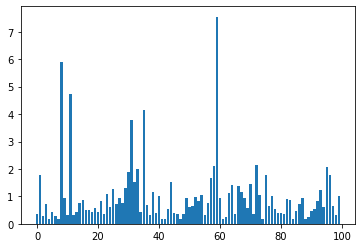

In [116]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(np.arange(r.shape[0]), r);